In [1]:
quarter = "Q1"

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("DataCustomers.csv" ,index_col=0)
df.sample(15)

,CustomerID,Quarter,Age,Income,SpendingScore
3435,3436,Q3,47,4506,43
7311,7312,Q4,51,10426,13
5814,5815,Q3,55,3638,87
9676,9677,Q3,39,10444,19
1627,1628,Q1,49,9639,64
6356,6357,Q1,35,11917,53
2159,2160,Q1,64,8182,37
1148,1149,Q3,35,10349,5
3587,3588,Q4,52,4085,23
5747,5748,Q2,25,5256,54


In [4]:
filtered = df[df["Quarter"] == quarter]
print(f"Data for {quarter} : {len(filtered)}")

Data for Q1 : 2536


In [5]:
df.head()

,CustomerID,Quarter,Age,Income,SpendingScore
0,1,Q3,57,11766,81
1,2,Q4,24,8660,6
2,3,Q1,49,8906,13
3,4,Q3,36,13723,86
4,5,Q3,23,9050,75


In [6]:
df.shape

(10000, 5)

In [7]:
print(filtered[["Age", "Income", "SpendingScore"]].describe())

               Age        Income  SpendingScore
count  2536.000000   2536.000000    2536.000000
mean     41.201498   8952.401420      49.695978
std      13.379870   3491.880513      28.811340
min      18.000000   3012.000000       1.000000
25%      30.000000   5879.500000      25.000000
50%      42.000000   8883.000000      48.000000
75%      53.000000  11975.500000      75.000000
max      64.000000  14996.000000      99.000000


In [8]:
X = filtered[["Age", "Income", "SpendingScore"]]

kmeans = KMeans(n_clusters=3, random_state=42)
filtered["Cluster"] = kmeans.fit_predict(X)

C:\Users\Pongo\AppData\Local\Temp\ipykernel_18640\928535167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["Cluster"] = kmeans.fit_predict(X)


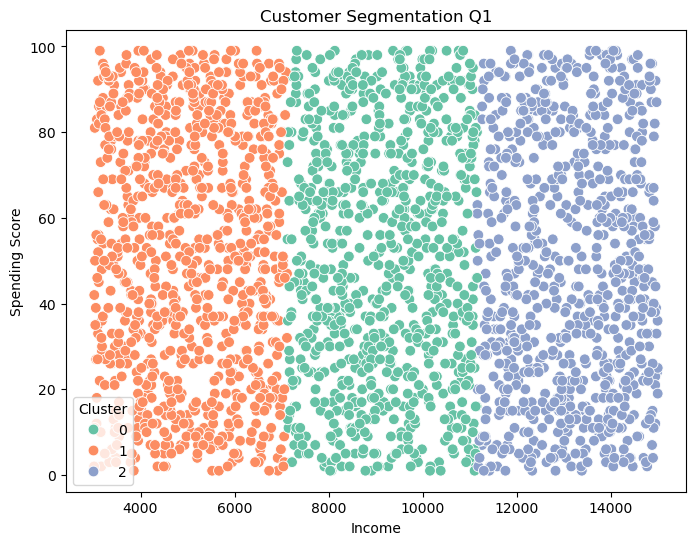

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(
data=filtered,
x="Income", y="SpendingScore",
hue="Cluster", palette="Set2", s=60
)
plt.title(f"Customer Segmentation {quarter}")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.legend(title="Cluster")
plt.show()